In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the images

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Preproceesing the image

In [ ]:
''' First we'll normalize the image ie making it between -1 and 1 since i am using tanh activation in generator last layer otherwise make it 0-1'''
X_train = X_train/255
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1.#Making the values between -1 and 1
X_test = X_test/255
X_test = X_test.reshape(-1, 28, 28, 1) * 2. - 1.

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [ ]:
random_noise_size=100#given

#### Creating the Generator

In [ ]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[random_noise_size]))#Using 7 so I can build upto 28
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",activation="tanh"))

#### Creating the discriminator

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.3),input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))   #Adding dropout to prevent overfitting
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

#### Binary CrossEntropy: It is a loss function specifically used when there is a binary classifier. It is a log loss function

#### Joining generator and discriminator

In [ ]:
GAN = Sequential([generator, discriminator])

In [ ]:
discriminator.trainable = False #Setting discrimator trainability to false so as to train the Gan

In [ ]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
GAN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [ ]:
batch_size=30 #Can be user set
data=X_train
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size=1000) #shuffling

In [ ]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1) #Creating batches

### Train

In [ ]:
generator, discriminator = GAN.layers
epochs=2 #can be user set.
for e in range(epochs):
    i=0 # just to keep in touch with the batch numbers
    print(f'I am currently in epoch number :{e}')
    for x in dataset:
        i+=1
        if i%20==0:
            print(f'\tCurrently in batch number {i} of {len(data)//batch_size}')

        '''Training the discriminator'''
        noise = tf.random.normal(shape=[batch_size, random_noise_size])  # creating some random noise
        gen=generator(noise)
        gen_real = tf.concat([gen, tf.dtypes.cast(x,tf.float32)], axis=0) # Concatenate Generated Images against the Real Ones
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size) #Setting targets for fake and real 0-Fake
        discriminator.trainable = True
        discriminator.train_on_batch(gen_real, y1)

        '''Training the generator'''
        y2 = tf.constant([[1.]] * batch_size)
        discriminator.trainable = False #we dont want to train discriminator now
        GAN.train_on_batch(noise, y2)
print('Training Complete')

I am currently in epoch number :0
	Currently in batch number 20 of 2000
	Currently in batch number 40 of 2000
	Currently in batch number 60 of 2000
	Currently in batch number 80 of 2000
	Currently in batch number 100 of 2000
	Currently in batch number 120 of 2000
	Currently in batch number 140 of 2000
	Currently in batch number 160 of 2000
	Currently in batch number 180 of 2000
	Currently in batch number 200 of 2000
	Currently in batch number 220 of 2000
	Currently in batch number 240 of 2000
	Currently in batch number 260 of 2000
	Currently in batch number 280 of 2000
	Currently in batch number 300 of 2000
	Currently in batch number 320 of 2000
	Currently in batch number 340 of 2000
	Currently in batch number 360 of 2000
	Currently in batch number 380 of 2000
	Currently in batch number 400 of 2000
	Currently in batch number 420 of 2000
	Currently in batch number 440 of 2000
	Currently in batch number 460 of 2000
	Currently in batch number 480 of 2000
	Currently in batch number 500 of 

### Testing the GAN with some random noise

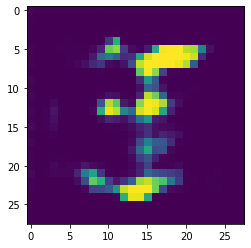

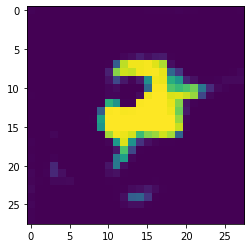

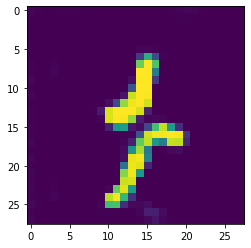

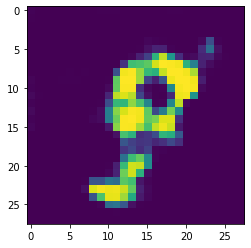

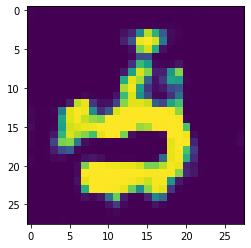

In [ ]:
noise = tf.random.normal(shape=[5, random_noise_size])# Using 5 images
img=generator(noise)
for im in img:
    plt.imshow(im.numpy().reshape(28,28))
    plt.show()

#### Remarks: I could train it for more epochs but it would take centuries to complete on my laptop :C
#### But our model has 'somewhat' learned to identify the patterns